<a href="https://colab.research.google.com/github/Kadakol/ML/blob/master/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /root/.kaggle
!echo '{"username":"akshaykadakol","key":"383f2d269ce7374e747a0cd8b237b390"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog
!ls
!unzip cat-and-dog.zip -d cat-and-dog
!ls -ltra cat-and-dog

 95% 208M/218M [00:05<00:00, 39.6MB/s]
100% 218M/218M [00:05<00:00, 39.4MB/s]
cat-and-dog.zip  sample_data
Archive:  cat-and-dog.zip
  inflating: cat-and-dog/test_set/test_set/cats/_DS_Store  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4001.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4002.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4003.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4004.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4005.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4006.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4007.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4008.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4009.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4010.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4011.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat.4012.jpg  
  inflating: cat-and-dog/test_set/test_set/cats/cat

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="./cat-and-dog/training_set/training_set", target_size=(227,227))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="./cat-and-dog/test_set/test_set", target_size=(227,227))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [3]:
import collections

print(traindata.class_indices)
print(traindata.data_format)
print(traindata.image_shape)
print(traindata.target_size)
print(traindata.labels)
counter=collections.Counter(traindata.labels)
print(counter)
print(traindata.num_classes)
print(traindata.samples)
print(traindata.batch_index)
print(traindata.batch_size)
print(traindata.shuffle)

print()

print(testdata.class_indices)
print(testdata.data_format)
print(testdata.image_shape)
print(testdata.target_size)
print(testdata.labels)
counter=collections.Counter(testdata.labels)
print(counter)
print(testdata.num_classes)
print(testdata.samples)
print(testdata.batch_index)
print(testdata.batch_size)
print(testdata.shuffle)

{'cats': 0, 'dogs': 1}
channels_last
(227, 227, 3)
(227, 227)
[0 0 0 ... 1 1 1]
Counter({1: 4005, 0: 4000})
2
8005
0
32
True

{'cats': 0, 'dogs': 1}
channels_last
(227, 227, 3)
(227, 227)
[0 0 0 ... 1 1 1]
Counter({1: 1012, 0: 1011})
2
2023
0
32
True


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,), activation = "relu"))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = "relu"))

# 3rd Fully Connected Layer
model.add(Dense(1000, activation = "relu"))

# Output Layer
model.add(Dense(2, activation = "softmax")) #As we have two classes

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=1e-6)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("alexnet.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
hist = model.fit_generator(steps_per_epoch=10, generator=traindata, validation_data=testdata, validation_steps=10, epochs=100, callbacks=[checkpoint])

Epoch 1/100
10/10 [==============================] - 1s 143ms/step - loss: 0.8003 - acc: 0.5500

Epoch 00001: val_acc improved from -inf to 0.55000, saving model to alexnet.h5
10/10 [==============================] - 12s 1s/step - loss: 1.0408 - acc: 0.5031 - val_loss: 0.8003 - val_acc: 0.5500
Epoch 2/100
10/10 [==============================] - 1s 147ms/step - loss: 0.7619 - acc: 0.5844

Epoch 00002: val_acc improved from 0.55000 to 0.58438, saving model to alexnet.h5
10/10 [==============================] - 4s 422ms/step - loss: 0.9516 - acc: 0.4406 - val_loss: 0.7619 - val_acc: 0.5844
Epoch 3/100
10/10 [==============================] - 2s 150ms/step - loss: 0.7333 - acc: 0.6094

Epoch 00003: val_acc improved from 0.58438 to 0.60938, saving model to alexnet.h5
10/10 [==============================] - 17s 2s/step - loss: 0.7839 - acc: 0.5750 - val_loss: 0.7333 - val_acc: 0.6094
Epoch 4/100
10/10 [==============================] - 1s 142ms/step - loss: 0.8233 - acc: 0.5594

Epoch 0000

{'loss': [1.0407530307769775, 0.9516108572483063, 0.7839355349540711, 0.6841319441795349, 0.7608560224035087, 0.7294827491044998, 0.7347162902355194, 0.6717327296733856, 0.6985224723815918, 0.7085689008235931, 0.6501353442668915, 0.6743742823600769, 0.7381056845188141, 0.7038440763950348, 0.6635291993618011, 0.6733441323041915, 0.6607907027006149, 0.7298048794269562, 0.6352192729711532, 0.6634538412094116, 0.6581610023975373, 0.6869813889265061, 0.6900455087423325, 0.7178550958633423, 0.6477849423885346, 0.6294766664505005, 0.615281754732132, 0.6318319976329804, 0.5907926499843598, 0.5679235070943832, 0.5924361997090102, 0.5947581112384797, 0.6229639828205109, 0.5447364151477814, 0.5722559124231339, 0.6474959999322891, 0.5912263542413712, 0.6101177990436554, 0.5729263901710511, 0.538404455780983, 0.5593095421791077, 0.568608096241951, 0.6400453627109528, 0.6561584204435349, 0.6346646666526794, 0.6596886932849884, 0.7236522287130356, 0.6543077290058136, 0.6475771069526672, 0.65987752079

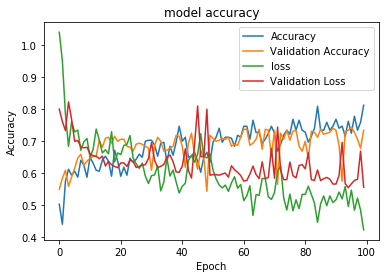

In [8]:
import matplotlib.pyplot as plt

print(hist.history)
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [9]:
!wget "https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg"
!mv website-donate-mobile.jpg ./cat-and-dog/dog_test.png

--2020-01-06 06:14:59--  https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg
Resolving www.guidedogs.org (www.guidedogs.org)... 192.138.21.222
Connecting to www.guidedogs.org (www.guidedogs.org)|192.138.21.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47539 (46K) [image/jpeg]
Saving to: ‘website-donate-mobile.jpg’

website-donate-mobi 100%[===================>]  46.42K   219KB/s    in 0.2s    

2020-01-06 06:15:00 (219 KB/s) - ‘website-donate-mobile.jpg’ saved [47539/47539]



[[0.10843372 0.8915663 ]]
dog


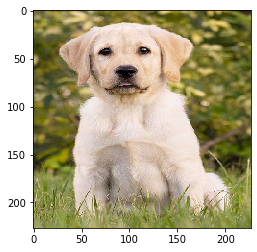

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("./cat-and-dog/dog_test.png",target_size=(227,227))
img = np.asarray(img, dtype=np.float32)
plt.imshow(img.astype(np.uint8))
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

In [11]:
from tensorflow.keras.models import load_model

saved_model = load_model("alexnet.h5")
output = saved_model.predict(img)
print(output)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[[0.09619512 0.9038049 ]]
dog
